# Lecture 46: What is a Category data type?

In [1]:
import pandas as pd
import os
os.getcwd()

'/home/eloy/Programming/Udemy/Python_A_to_Z'

In [2]:
# Make sure the current working directory is the one with our data in it
# If not
#os.chdir('/home/eloy/Programming/Udemy/Python_A_to_Z/')

In [3]:
movies = pd.read_csv("Movie-Ratings.csv")

In [4]:
len(movies)

559

In [5]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [6]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [7]:
# We probably want to clean up these column names to make them 'nicer'
# i.e. no spaces, no odd characters (%, $), standardized case, etc.
movies.columns = ['Film','Genre','RTRating','AudienceRating','Budget','YearOfRelease']

In [8]:
movies.head()

,Film,Genre,RTRating,AudienceRating,Budget,YearOfRelease
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
RTRating          559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
YearOfRelease     559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.2+ KB


In [10]:
# Note that the last four columns are all numeric int64 types
# However, if you think of how we might use YearOfRelease in our analysis
# it probably more closely matches Genre than Ratings or Budget
# We may want to group by year. So this means it should be treaded as a 
# Category type, not a numeric.

In [11]:
movies.describe()

,RTRating,AudienceRating,Budget,YearOfRelease
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
# Case in point again, the .describe() function results make little
# sense for the YearOfRelease variable. This is another clue that
# YearOfRelease is a Category Variable
#
# So let's change this, and the other 'object' types to categories
# Note: This is the same as a 'factor' in R

In [13]:
movies.Film = movies.Film.astype('category')

In [14]:
movies.Genre = movies.Genre.astype('category')

In [15]:
movies.YearOfRelease = movies.YearOfRelease.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null category
Genre             559 non-null category
RTRating          559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
YearOfRelease     559 non-null category
dtypes: category(3), int64(3)
memory usage: 21.9 KB


In [17]:
# To get unique values of any category...
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [18]:
# or
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

# Lecture 47: Working with JointPlots

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [20]:
# Jointplots

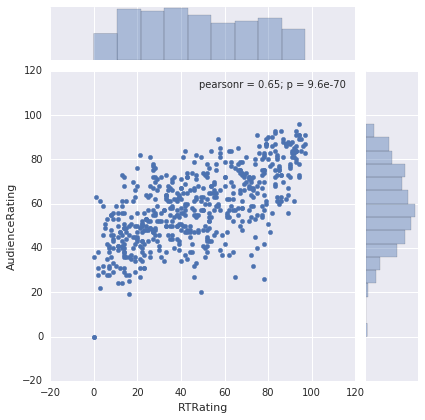

In [21]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating')

In [22]:
# Note that AudienceRating is nearly Normal, while RTRating (the critics at Rotten Tomatoes) is more uniform
# Let's take the above chart and make some changes

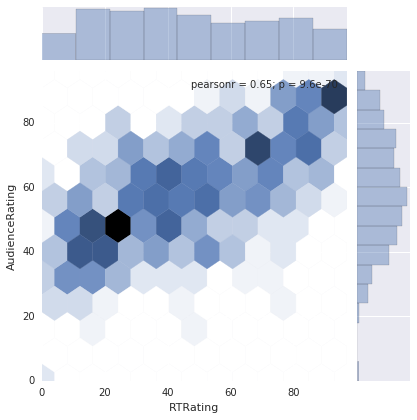

In [23]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='hex')

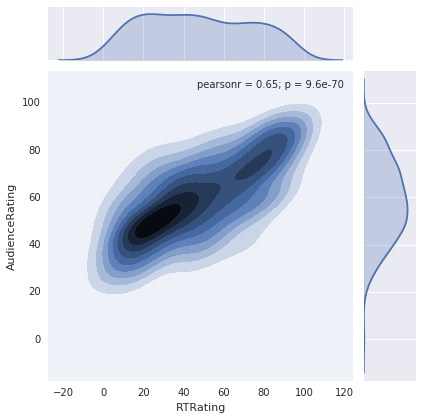

In [24]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='kde')

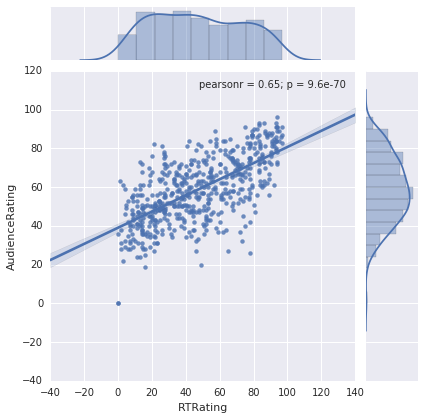

In [25]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='reg')

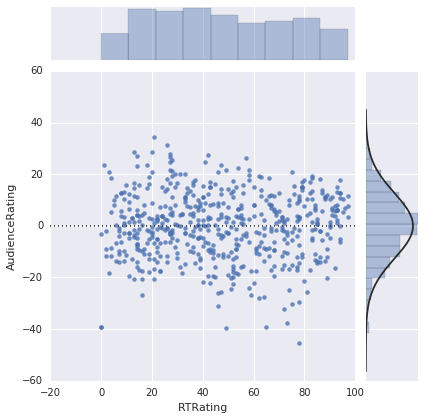

In [26]:
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating', kind='resid')

# Lecture 48: Histograms

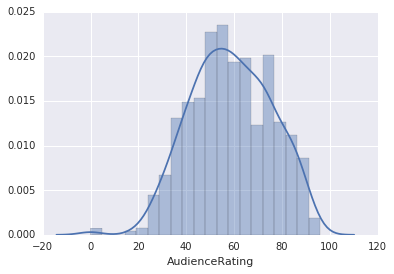

In [27]:
m1 = sns.distplot(movies.AudienceRating, bins=20)

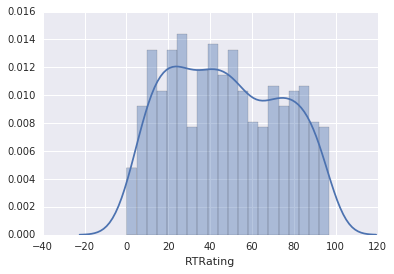

In [28]:
m2 = sns.distplot(movies.RTRating, bins=20)

In [29]:
# What would this look like in base pyplot, without the seaborn add-on

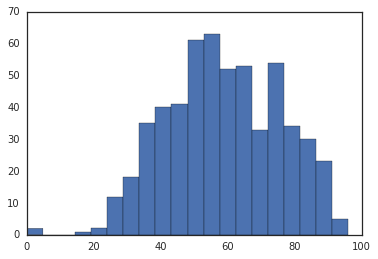

In [30]:
sns.set_style('white') # Go back to default style
n1 = plt.hist(movies.AudienceRating, bins=20)

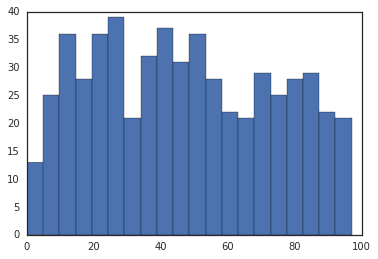

In [31]:
n1 = plt.hist(movies.RTRating,bins=20)

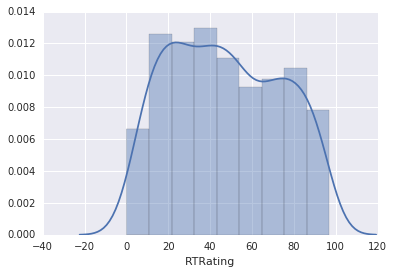

In [32]:
sns.set() # Set default styling back and check
sns.distplot(movies.RTRating)

# Lecture 49: Stacked historgrams in Python

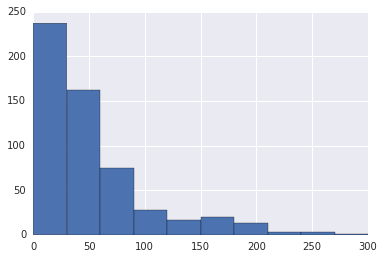

In [33]:
h1 = plt.hist(movies.Budget)

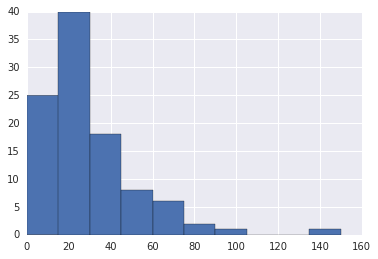

In [34]:
# But if we only want to see a certain Genre, we need to filter
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.show()

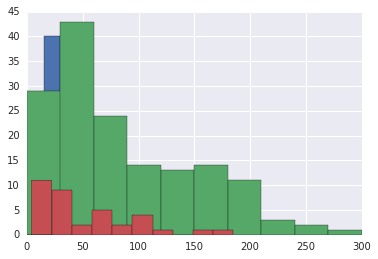

In [35]:
# We can see multiple on the same plot
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.hist(movies[movies.Genre == 'Action'].Budget)
plt.hist(movies[movies.Genre == 'Thriller'].Budget)
plt.show()

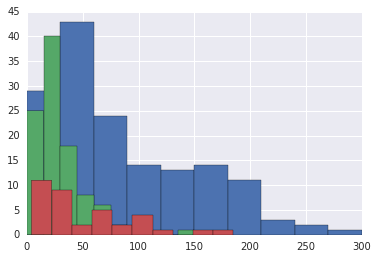

In [36]:
#But Drama is hidden, so we need to manually change the order (First goes in back, last in front)
plt.hist(movies[movies.Genre == 'Action'].Budget)
plt.hist(movies[movies.Genre == 'Drama'].Budget)
plt.hist(movies[movies.Genre == 'Thriller'].Budget)
plt.show()

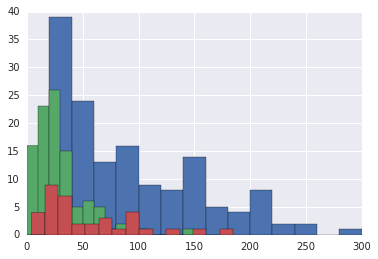

In [37]:
# But the default # bins are different for each, so let's standardize
plt.hist(movies[movies.Genre == 'Action'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Drama'].Budget, bins=15)
plt.hist(movies[movies.Genre == 'Thriller'].Budget, bins=15)
plt.show()

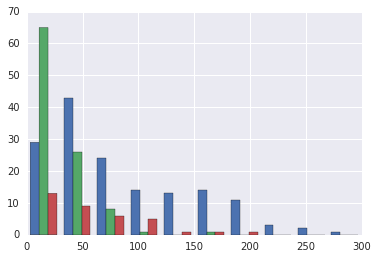

In [38]:
# But if we didn't want to have to worry about bars being hidden
# We could show them side-by-side by passing in a list
BudgetByGenre = [movies[movies.Genre == 'Action'].Budget,
                 movies[movies.Genre == 'Drama'].Budget,
                 movies[movies.Genre == 'Thriller'].Budget]
plt.hist(BudgetByGenre)
plt.show()

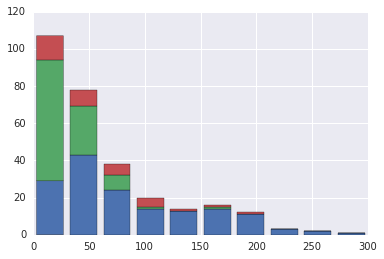

In [39]:
# Or we could stack them by setting the parameter 'stacked' to True
plt.hist(BudgetByGenre, stacked=True)
plt.show()

In [40]:
# This is fine for smaller numbers of groups, but what if we had a lot of genres or whatever
# our group may be?
genrelist = list()

In [41]:
for genre in movies.Genre.cat.categories:
    genrelist.append(movies[movies.Genre == genre].Budget)

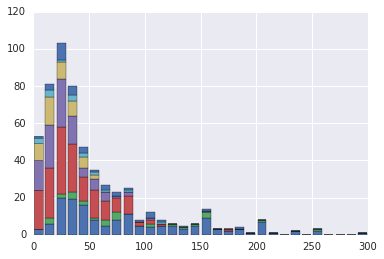

In [42]:
plt.hist(genrelist, stacked=True, bins=30)
plt.show()

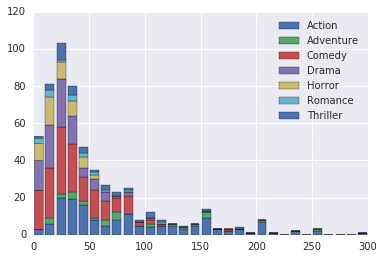

In [43]:
# Now to create a legend, which also needs to be a list
genreLabels = []
for genre in movies.Genre.cat.categories:
    genreLabels.append(genre)

plt.hist(genrelist, stacked=True,bins=30, label=genreLabels)
plt.legend()
plt.show()

# Lecture 50: Creating a KDE Plot

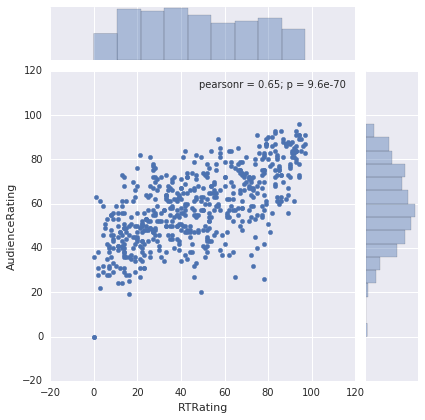

In [44]:
# Kernel Density Estimate Plot
# How can we visualize Audience Rating vs Critic Rating?
# A scatter plot or joint plot would be one idea, which we've already done.
j = sns.jointplot(data=movies,x='RTRating', y='AudienceRating')

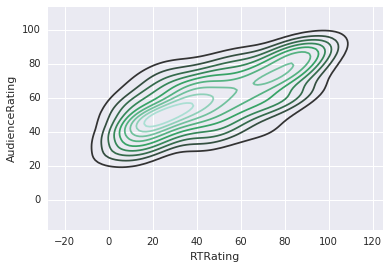

In [45]:
# Another way would be with a KDE plot
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating)

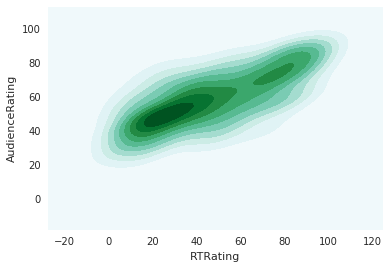

In [46]:
# Shading
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, shade=True)

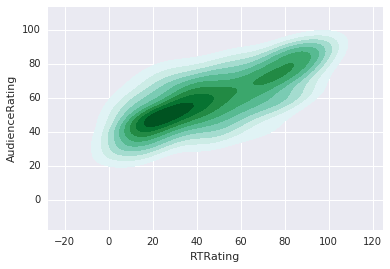

In [47]:
# That removes our grid due to the entire rest of the plot being considered part of the lowest shade
# We can fix this though
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, shade=True, shade_lowest=False)

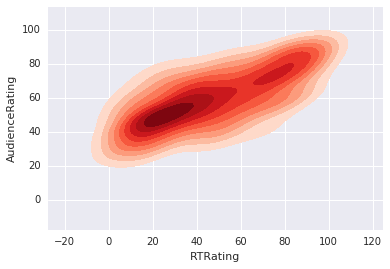

In [48]:
# We can also use pre-defined colour palettes
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')

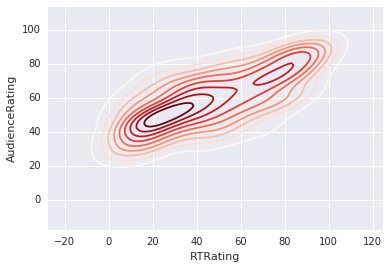

In [49]:
# Tip: To make a clearer graph, note that if we only do the cmap
# we get a nice outline
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating, cmap='Reds')

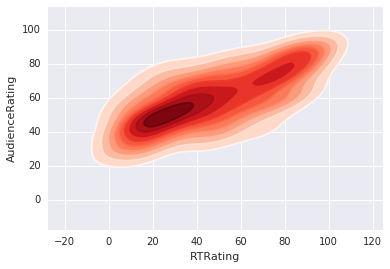

In [50]:
# Now we can overlay the outline ontop of the shaded plot as two seperate plots
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')
k12 = sns.kdeplot(movies.RTRating, movies.AudienceRating,cmap='Reds')

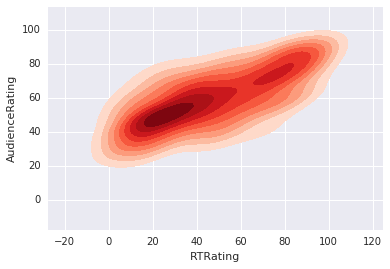

In [51]:
# and the original, for comparison
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Reds')

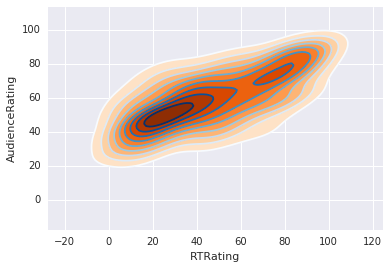

In [52]:
# Or you could use different colors
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Oranges')
k12 = sns.kdeplot(movies.RTRating, movies.AudienceRating,cmap='Blues')

# Lecture 51: Working with Subplots()

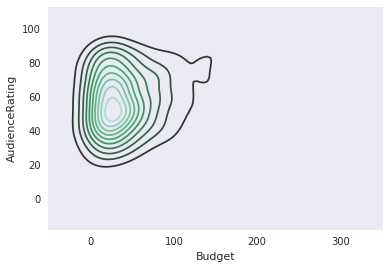

In [56]:
sns.set_style("dark")
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating)

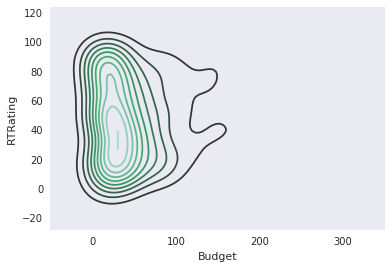

In [57]:
k1 = sns.kdeplot(movies.Budget, movies.RTRating)

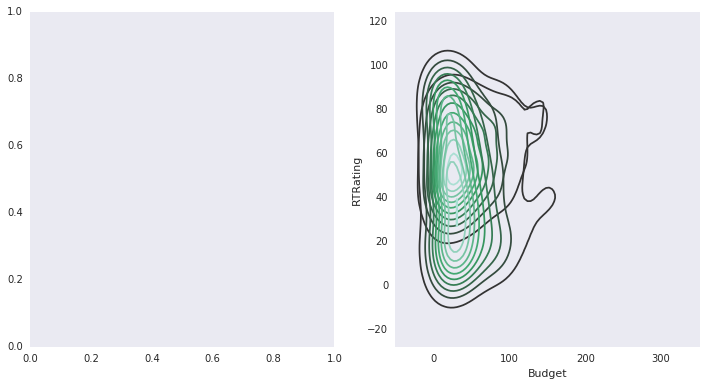

In [59]:
# Now with subplots
f, ax = plt.subplots(1,2, figsize= (12,6)) # 1 Row, 2 Columns
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating)
k2 = sns.kdeplot(movies.Budget, movies.RTRating)

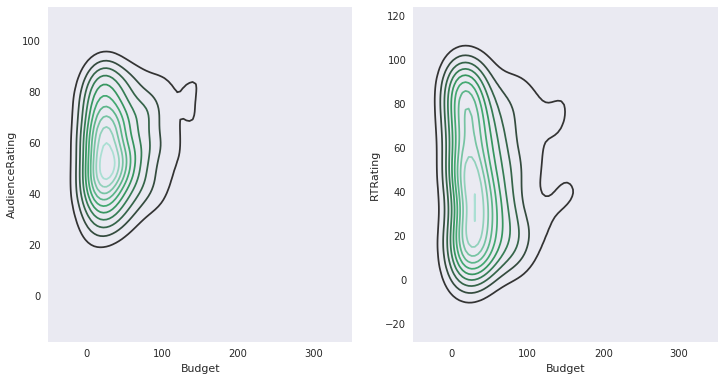

In [60]:
# This put them both in the same plot, how can we fix this?
f, axes = plt.subplots(1,2, figsize= (12,6)) # 1 Row, 2 Columns
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.Budget, movies.RTRating, ax=axes[1])

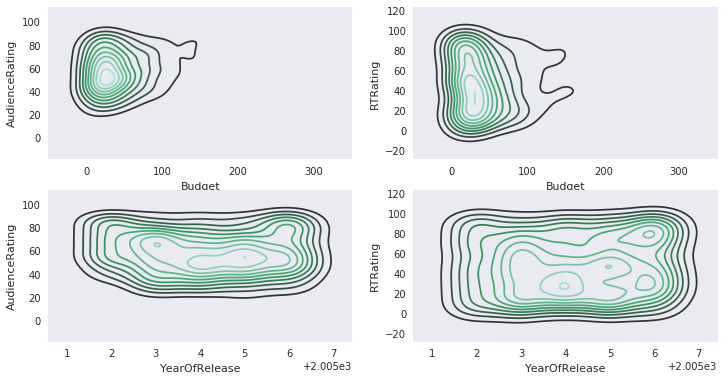

In [61]:
# With multiple dimentions
f, axes = plt.subplots(2,2, figsize= (12,6)) # 2 Rows, 2 Columns
k00 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax=axes[0,0])
k01 = sns.kdeplot(movies.Budget, movies.RTRating, ax=axes[0,1])
k10 = sns.kdeplot(movies.YearOfRelease, movies.AudienceRating, ax=axes[1,0])
k11 = sns.kdeplot(movies.YearOfRelease, movies.RTRating, ax=axes[1,1])

[(2005, 2015)]

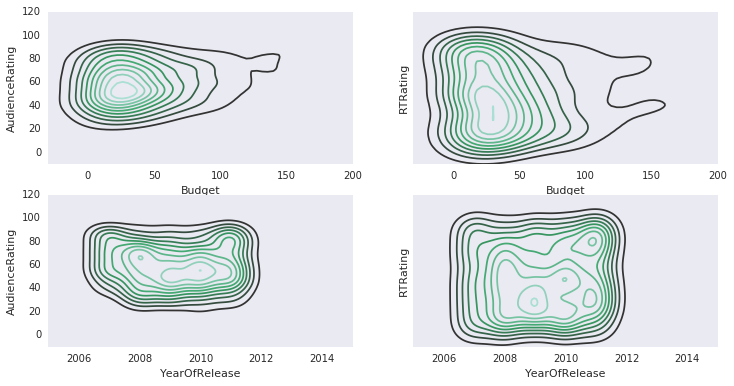

In [74]:
# Edits
f, axes = plt.subplots(2,2, figsize= (12,6), sharex=False, sharey=True) 
# 2 Rows, 2 Columns, set fig size, make all graphs share the same axis range
k00 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax=axes[0,0])
k01 = sns.kdeplot(movies.Budget, movies.RTRating, ax=axes[0,1])
k10 = sns.kdeplot(movies.YearOfRelease.astype('int'), movies.AudienceRating, ax=axes[1,0])
k11 = sns.kdeplot(movies.YearOfRelease.astype('int'), movies.RTRating, ax=axes[1,1])
k00.set(xlim=(-30,200),ylim=(-10,120)) # Y Limit only needs set once, since it's shared above
k01.set(xlim=(-30,200))
k10.set(xlim=(2005,2015))
k11.set(xlim=(2005,2015))

# Lecture 52: Violinplots vs Boxplots

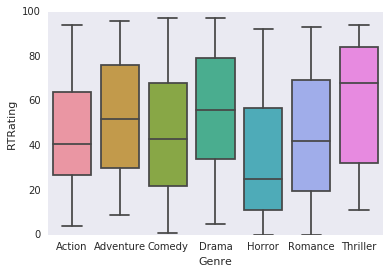

In [76]:
w = sns.boxplot(data=movies, x='Genre', y='RTRating')
# Box plots shows you the min, Q1, Median, Q3, and Max

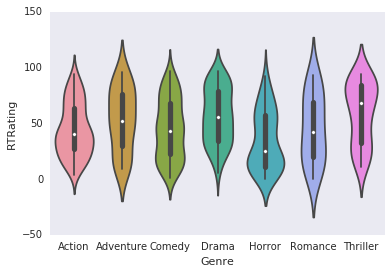

In [75]:
z = sns.violinplot(data=movies, x='Genre', y='RTRating')
# Violin plot shows you basically the same information except
# the width shows you the distribution rather than the with 
# the relative height of the boxes in the box plot

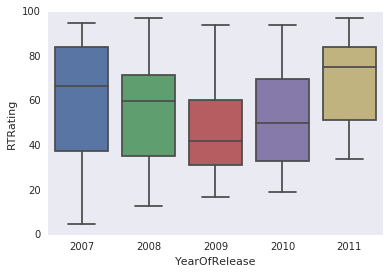

In [80]:
# An example to illustrate the differences more...
w = sns.boxplot(data=movies[movies.Genre=='Drama'], x='YearOfRelease', y='RTRating')

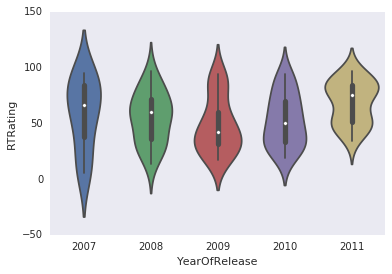

In [81]:
w = sns.violinplot(data=movies[movies.Genre=='Drama'], x='YearOfRelease', y='RTRating')

The 2008 and 2011 boxes look very similar, other than their different medians
But the violin plot shows a dual peak distribution in 2011, and a more smooth
distribution in 2008

# Lecture 53: Creating a Facet Grid

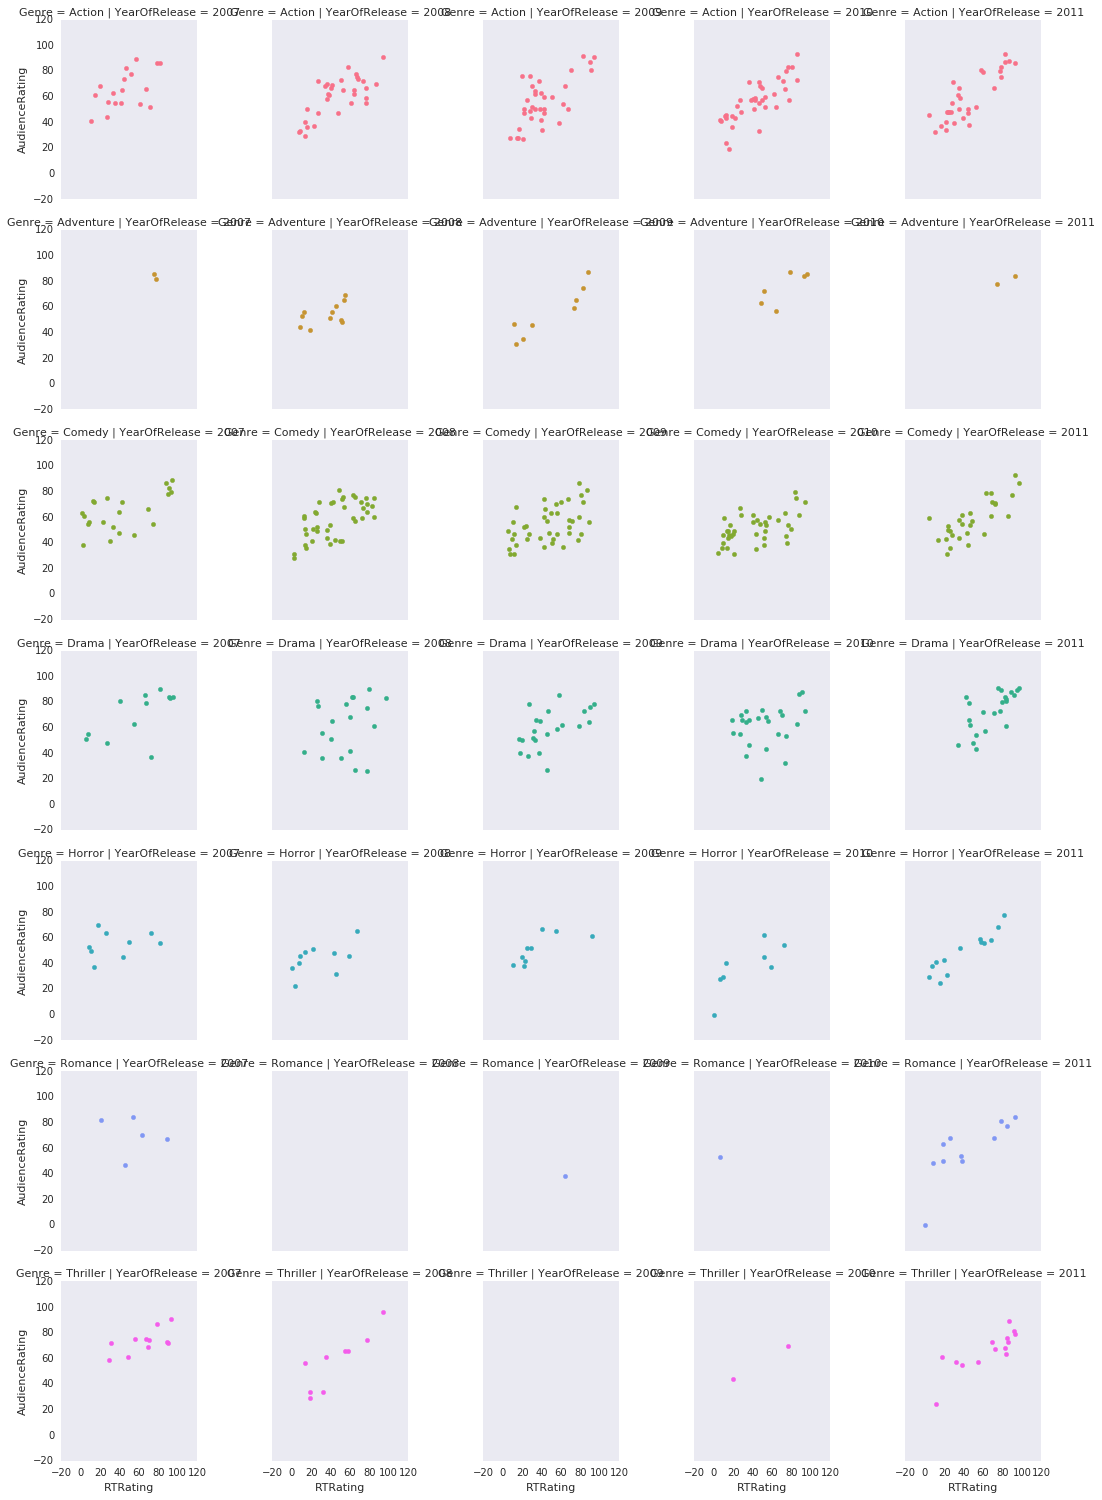

In [89]:
# Facet Grid will split your chart in 2 dimensions based on two different
# categorical (factor in R) variables.
# In this instance, the chart type we select is a scatter plot
# What we want to plot in each scatter plot is Audience Rating vs. Rotten Tomatos Critic Rating
# The two categorical variables we select are Genre and YearOfRelease
g = sns.FacetGrid(movies, row='Genre', hue='Genre', col='YearOfRelease')
g = g.map(plt.scatter, 'RTRating', 'AudienceRating')

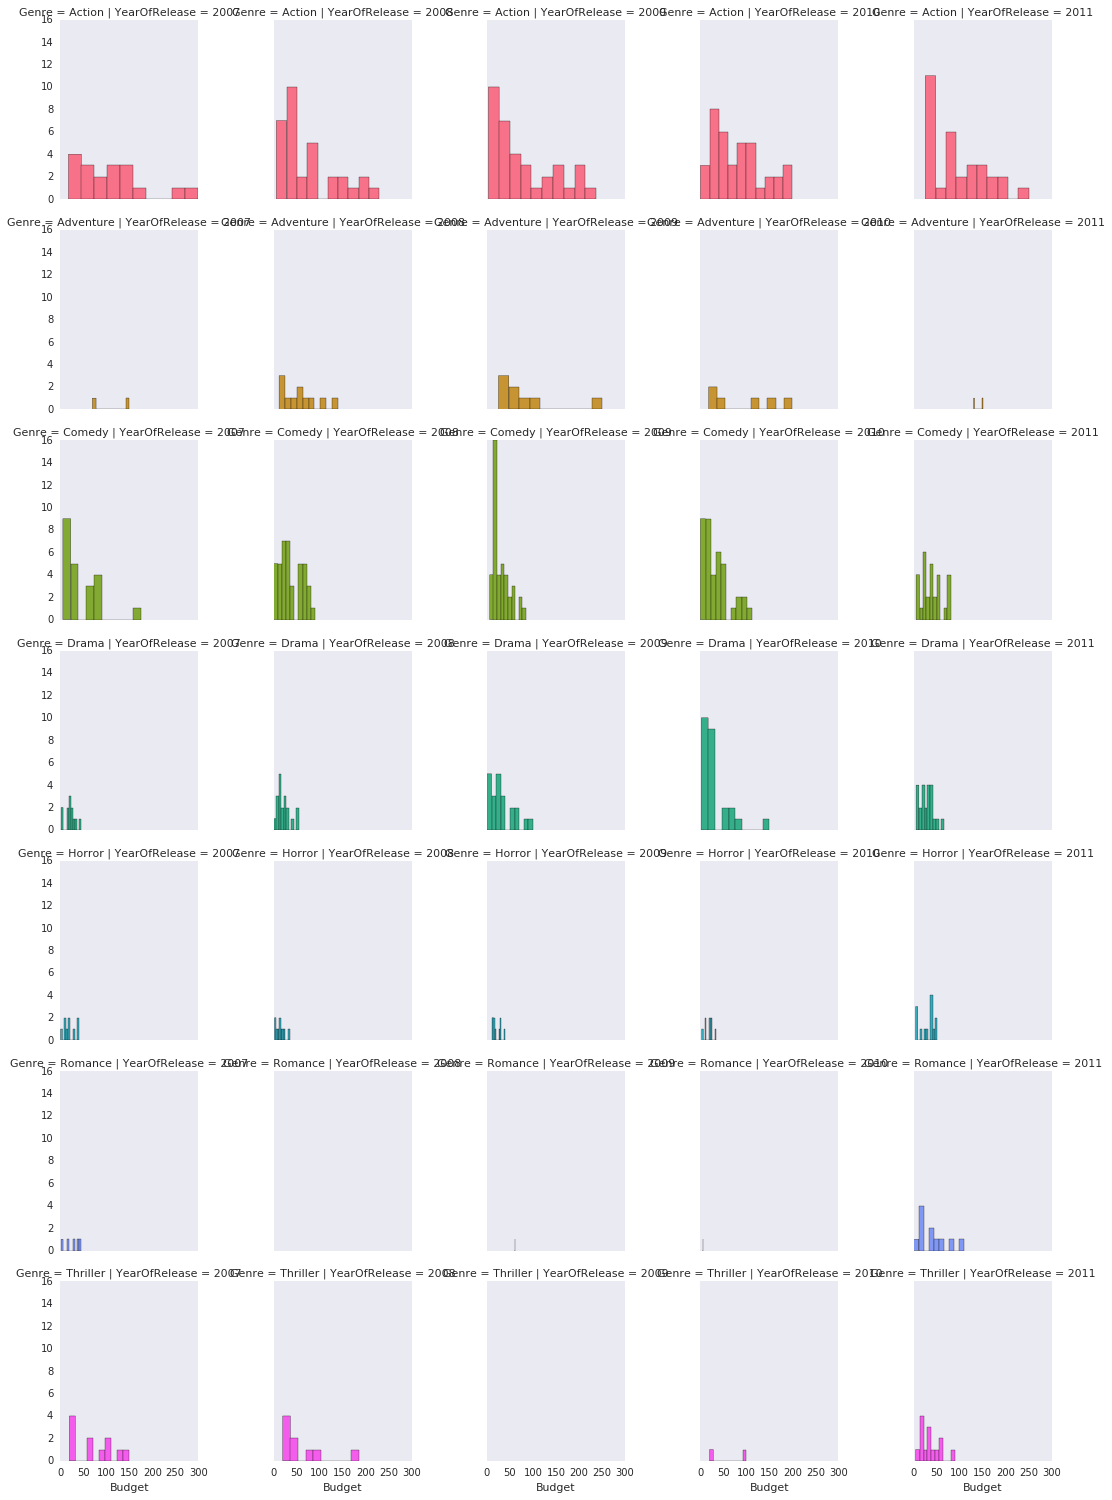

In [92]:
# In this instance, we choose a different  chart type
g = sns.FacetGrid(movies, row='Genre', hue='Genre', col='YearOfRelease')
g = g.map(plt.hist, 'Budget')

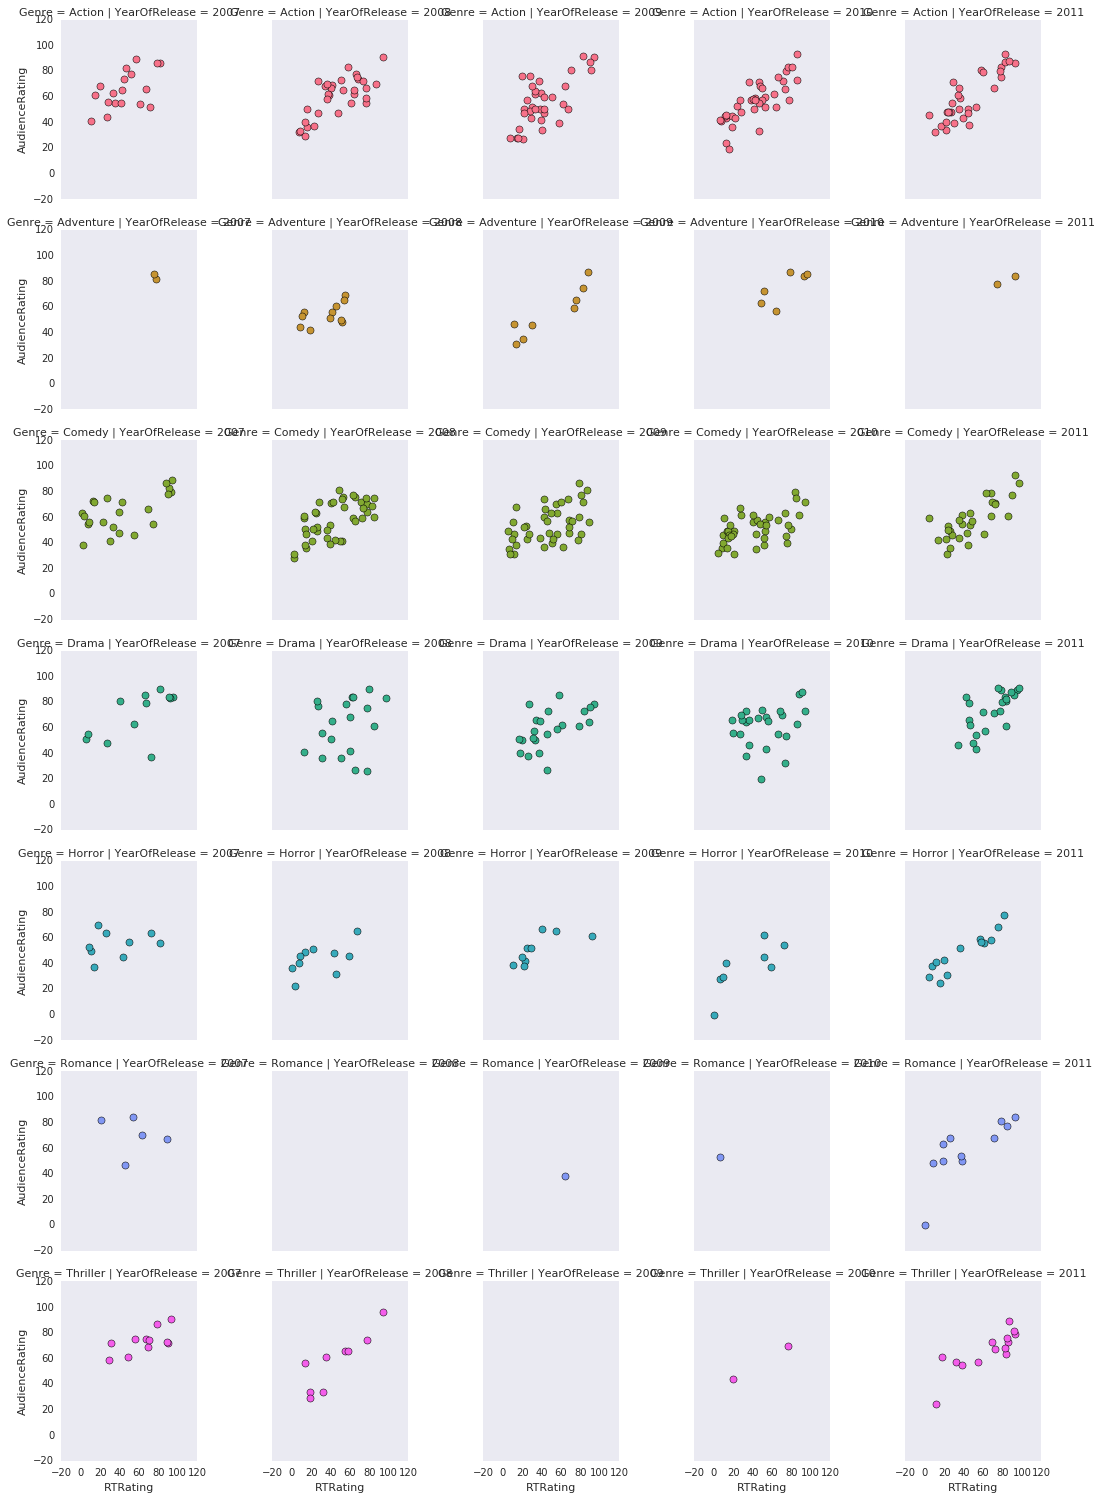

In [95]:
# Back to scatter plots, but let's add one more argument (key word arguments "kwargs") to our map function
g = sns.FacetGrid(movies, row='Genre', hue='Genre', col='YearOfRelease')
kws = dict(s=50,linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'RTRating', 'AudienceRating',**kws)

# Lecture 54: Coordinates and Diagonals

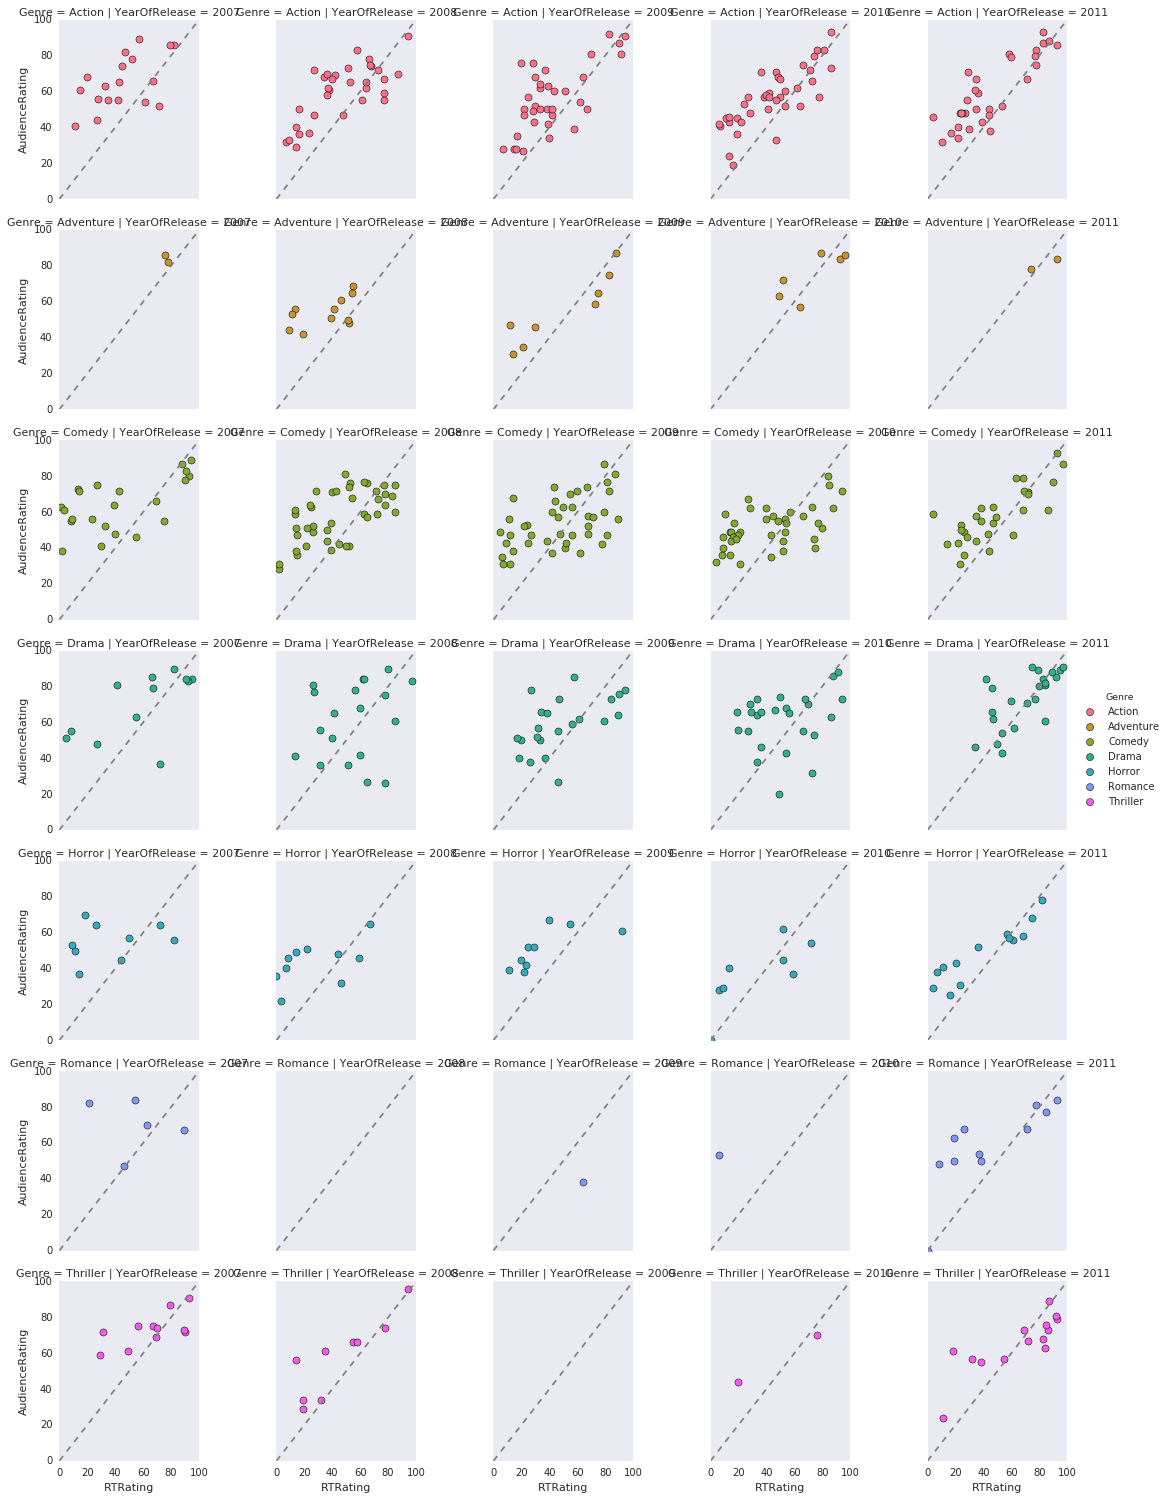

In [115]:
# First we'd like to edit our x and y axes to only go to the max rating of 100.
# Second, we'd like to add a diagonal, for reference. (i.e. the line y=x)
# This will allow us to easily see that if the dot is above the line, the audience 
# gave a better rating than the RT Critics, or vice versa
g = sns.FacetGrid(movies, row='Genre', hue='Genre', col='YearOfRelease')
kws = dict(s=50,linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'RTRating', 'AudienceRating',**kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100), c="gray", ls="--")
g.add_legend()

In [113]:
for ax in g.axes:
    print(ax)
    print(type(ax))
    for bx in ax:
        print(bx)
        print(type(bx.))
# We see that axes is an array of axes objects, a vector for each row
# 5x7, just like our Facet Plot grid. This is a numpy array, so it has
# the same methods as a numpy array. Nothing we can use for plotting our diagonal

<class 'numpy.ndarray'>
Axes(0.0518148,0.864225;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.247225,0.864225;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.442635,0.864225;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.638045,0.864225;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.833455,0.864225;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
Axes(0.0518148,0.725144;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.247225,0.725144;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.442635,0.725144;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.638045,0.725144;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
Axes(0.833455,0.725144;0.12568x0.118605)
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'numpy.ndarray'>
Axes(0.0518148,0.586062;0.12568x0.11

In [106]:
for ax in g.axes.flat:
    print(ax)
# And Axes.flat is just the internal axis objects
# These have methods we can use like plot()

Axes(0.0518148,0.864225;0.12568x0.118605)
Axes(0.247225,0.864225;0.12568x0.118605)
Axes(0.442635,0.864225;0.12568x0.118605)
Axes(0.638045,0.864225;0.12568x0.118605)
Axes(0.833455,0.864225;0.12568x0.118605)
Axes(0.0518148,0.725144;0.12568x0.118605)
Axes(0.247225,0.725144;0.12568x0.118605)
Axes(0.442635,0.725144;0.12568x0.118605)
Axes(0.638045,0.725144;0.12568x0.118605)
Axes(0.833455,0.725144;0.12568x0.118605)
Axes(0.0518148,0.586062;0.12568x0.118605)
Axes(0.247225,0.586062;0.12568x0.118605)
Axes(0.442635,0.586062;0.12568x0.118605)
Axes(0.638045,0.586062;0.12568x0.118605)
Axes(0.833455,0.586062;0.12568x0.118605)
Axes(0.0518148,0.44698;0.12568x0.118605)
Axes(0.247225,0.44698;0.12568x0.118605)
Axes(0.442635,0.44698;0.12568x0.118605)
Axes(0.638045,0.44698;0.12568x0.118605)
Axes(0.833455,0.44698;0.12568x0.118605)
Axes(0.0518148,0.307899;0.12568x0.118605)
Axes(0.247225,0.307899;0.12568x0.118605)
Axes(0.442635,0.307899;0.12568x0.118605)
Axes(0.638045,0.307899;0.12568x0.118605)
Axes(0.833455,0.

# Lecture 55: BONUS: Building Dashboards in Python

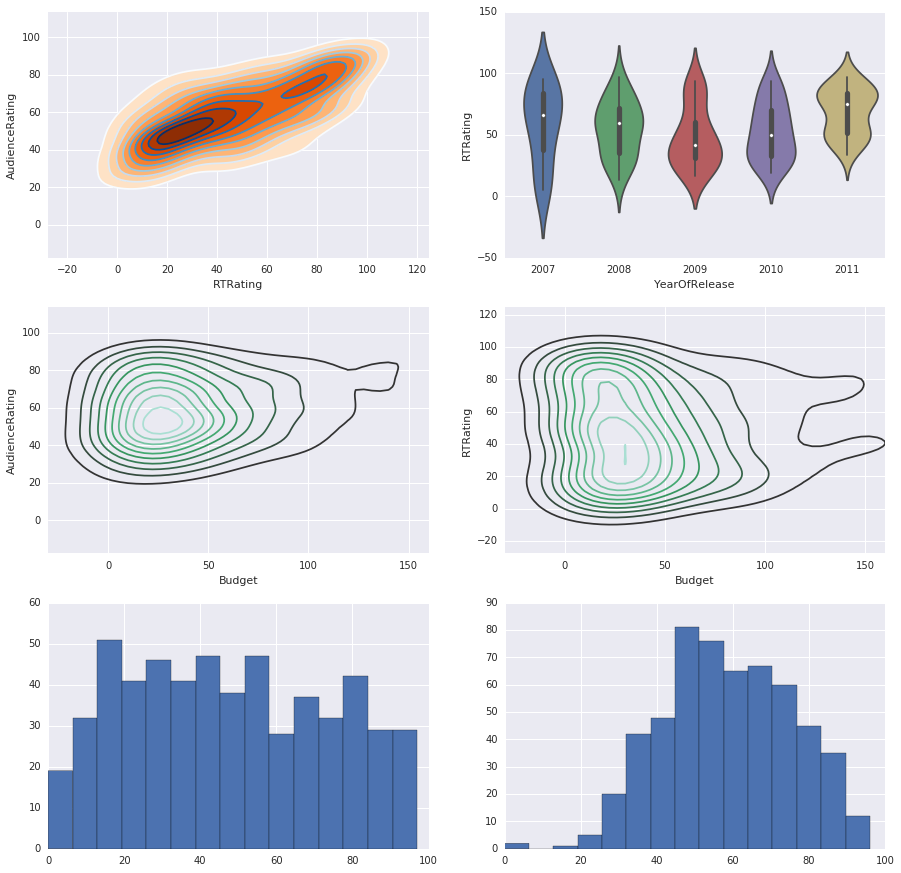

In [136]:
# A Dashboard is a combination of charts in one plot
sns.set_style("darkgrid")
f, ax = plt.subplots(3,2, figsize=(15,15))
k1 = sns.kdeplot(movies.RTRating, movies.AudienceRating,
                 shade=True, shade_lowest=False, cmap='Oranges', ax=ax[0,0])
k12 = sns.kdeplot(movies.RTRating, movies.AudienceRating,cmap='Blues',ax=ax[0,0])

w = sns.violinplot(data=movies[movies.Genre=='Drama'], x='YearOfRelease', y='RTRating',ax=ax[0,1])

k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax=ax[1,0])
k1.set(xlim=(-30,160))

k2 = sns.kdeplot(movies.Budget, movies.RTRating, ax=ax[1,1])
k2.set(xlim=(-30,160))

# For non-Seaborn plots, the method is a little different
ax[2,0].hist(movies.RTRating, bins=15)
ax[2,1].hist(movies.AudienceRating, bins=15)

plt.show()

# Lecture 56: BONUS: Styling Tips

# Lecture 57: BONUS: Finishing Touches